In [3]:
import numpy as np
import pandas as pd
from glob import glob
import shutil, os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
from os import listdir
from os.path import isfile, join
import yaml

train_df = pd.read_csv('/datadisk/kg/siim/tmp/train_df.csv')

fold = 3
train_files = []
val_files = []

val_files += list(train_df[train_df.fold == fold].path.unique())
train_files += list(train_df[train_df.fold != fold].path.unique())
print(len(train_files))
print(len(val_files))
classes = ['0. opacity']

os.makedirs('/kaggle/siim/siim-cov19/labels/train', exist_ok=True)
os.makedirs('/kaggle/siim/siim-cov19/labels/val', exist_ok=True)
os.makedirs('/kaggle/siim/siim-cov19/images/train', exist_ok=True)
os.makedirs('/kaggle/siim/siim-cov19/images/val', exist_ok=True)

label_dir = '/datadisk/kg/siim/labels'
for file in tqdm(train_files):
    shutil.copy(file, '/kaggle/siim/siim-cov19/images/train')
    filename = file.split('/')[-1].split('.')[0]
    shutil.copy(os.path.join(label_dir, filename+'.txt'), '/kaggle/siim/siim-cov19/labels/train')
    
for file in tqdm(val_files):
    shutil.copy(file, '/kaggle/siim/siim-cov19/images/val')
    filename = file.split('/')[-1].split('.')[0]
    shutil.copy(os.path.join(label_dir, filename+'.txt'), '/kaggle/siim/siim-cov19/labels/val')

cwd = '/kaggle/siim/'

with open(join( cwd , 'train.txt'), 'w') as f:
    for path in glob('/kaggle/siim/siim-cov19/images/train/*'):
        f.write(path+'\n')
            
with open(join( cwd , 'val.txt'), 'w') as f:
    for path in glob('/kaggle/siim/siim-cov19/images/val/*'):
        f.write(path+'\n')

data = dict(
    train =  join( cwd , 'train.txt') ,
    val   =  join( cwd , 'val.txt' ),
    nc    = 1,
    names = classes
    )

with open(join( cwd , 'siim-cov19.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(join( cwd , 'siim-cov19.yaml'), 'r')
print('\nyaml:')
print(f.read())

shutil.copytree('/home/yiw/siim/yolov5', '/kaggle/siim/yolov5')


4751
1583




yaml:
names:
- 0. opacity
nc: 1
train: /kaggle/siim/train.txt
val: /kaggle/siim/val.txt



'/kaggle/siim/yolov5'

In [1]:
import pandas as pd

df = pd.read_csv('/datadisk/kg/siim/tmp/train_df.csv')
'2ec8c6e591f6_image' in list(df[df.fold == 4].id)

True

In [2]:
os.chdir('/kaggle/siim/yolov5')

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1 _CudaDeviceProperties(name='GeForce RTX 2060 SUPER', major=7, minor=5, total_memory=7979MB, multi_processor_count=34)


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1 CUDA:0 (GeForce RTX 2060 SUPER, 7979.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/14 /kaggle/siim/yolov5/data/images/bicycle.jpg: 384x640 1 bicycle, Done. (0.007s)
image 2/14 /kaggle/siim/yolov5/data/images/bird.jpg: 384x640 2 birds, Done. (0.008s)
image 3/14 /kaggle/siim/yolov5/data/images/bott.jpg: 384x640 2 persons, 1 bottle, 6 wine glasss, 3 cups, 1 dining table, Done. (0.010s)
image 4/14 /kaggle/siim/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.008s)
image 5/14 /kaggle/siim/yolov5/data/images/dead.jpg: 384x640 13 persons, Done. (0.009s)
image 6/14 /kaggle/siim/yolov5/data/images/horse.jpg: 3

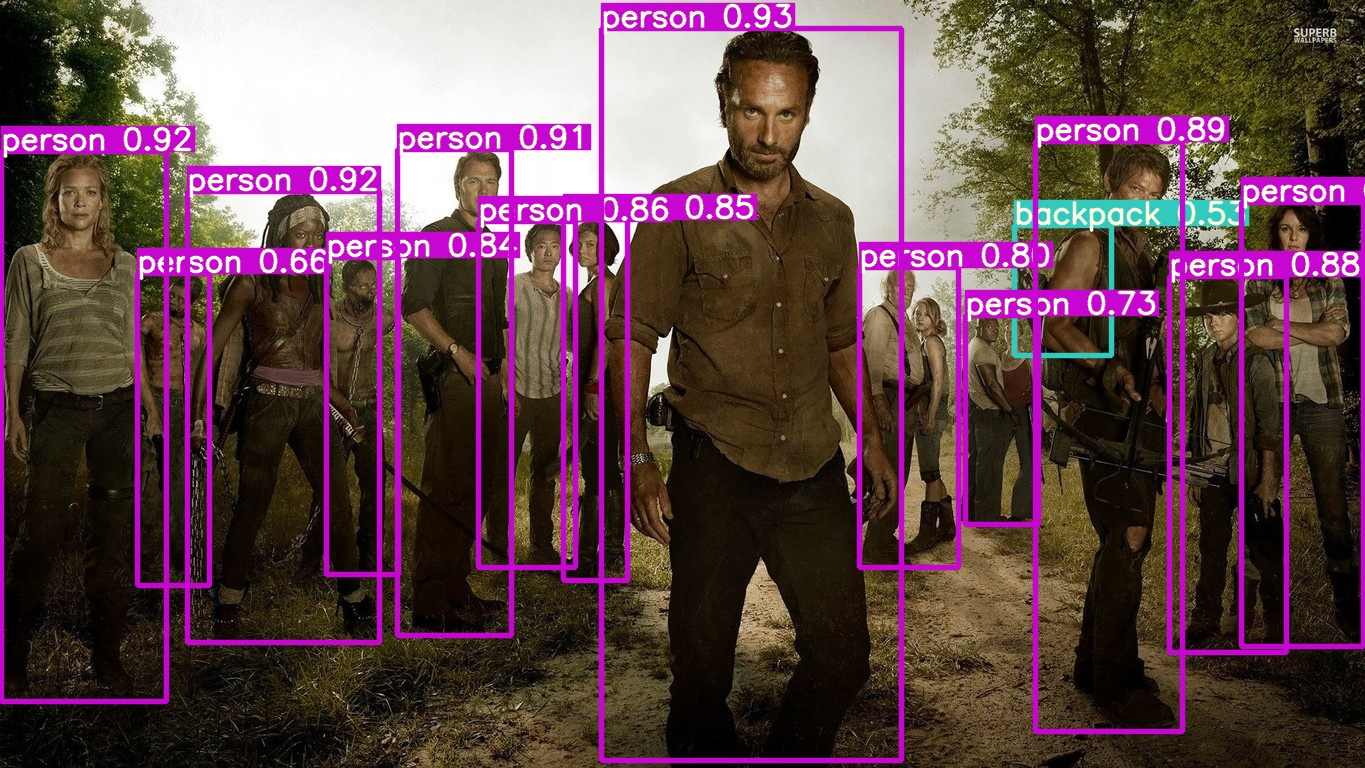

In [3]:
os.chdir('/kaggle/siim/yolov5')

import torch
from IPython.display import Image, clear_output  # to display images
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/dead.jpg', width=600)

In [6]:
import shutil
shutil.copy("/kaggle/working/hyp.scratch.yaml", '/kaggle/siim/')

'/kaggle/siim/hyp.scratch.yaml'

In [5]:
!python train.py --img 768 --batch 4 --epochs 35 --data /kaggle/siim/siim-cov19.yaml --hyp /kaggle/siim/hyp.scratch.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt --cache

github: ⚠️ WARNING: code is out of date by 351 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 v4.0-138-ged2c742 torch 1.8.1 CUDA:0 (GeForce RTX 2060 SUPER, 7979.1875MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='models/yolov5l.yaml', data='/kaggle/siim/siim-cov19.yaml', device='', entity=None, epochs=35, evolve=False, exist_ok=False, global_rank=-1, hyp='/kaggle/siim/hyp.scratch.yaml', image_weights=False, img_size=[768, 768], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp6', single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5l.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.032, momentum=0.